In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import RobustScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!unzip drive/My\ Drive/Colab\ Notebooks/y.ypeehaw

Archive:  drive/My Drive/Colab Notebooks/yeehaw.zip
  inflating: 1D_.csv                 
  inflating: 1E_.csv                 
  inflating: 2D_.csv                 
  inflating: 2E_.csv                 
  inflating: 3D_.csv                 
  inflating: 3E_.csv                 
  inflating: 4D_.csv                 
  inflating: 4E_.csv                 
  inflating: Dataset_D.csv           
  inflating: Dataset_E.csv           


In [ ]:
url='drive/MyDrive/Colab Notebooks/fraunhofer_eas_dataset_for_unbalance_detection_v1.zip'

In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile(url, 'r') as f:
    with f.open('0D.csv', 'r') as c:
        data_0D_train = pd.read_csv(c)
    with f.open('0E.csv', 'r') as c:
        data_0E_test = pd.read_csv(c)
    with f.open('1D.csv', 'r') as c:
        data_1D_train = pd.read_csv(c)
    with f.open('1E.csv', 'r') as c:
        data_1E_test = pd.read_csv(c)
    with f.open('2D.csv', 'r') as c:
        data_2D_train = pd.read_csv(c)
    with f.open('2E.csv', 'r') as c:
        data_2E_test = pd.read_csv(c)
    with f.open('3D.csv', 'r') as c:
        data_3D_train = pd.read_csv(c)
    with f.open('3E.csv', 'r') as c:
        data_3E_test = pd.read_csv(c)
    with f.open('4D.csv', 'r') as c:
        data_4D_train = pd.read_csv(c)
    with f.open('4E.csv', 'r') as c:
        data_4E_test = pd.read_csv(c)

In [ ]:
skip = 50000
data_0D_train = data_0D_train.iloc[skip:,:]
data_1D_train = data_1D_train.iloc[skip:,:]
data_2D_train = data_2D_train.iloc[skip:,:]
data_3D_train = data_3D_train.iloc[skip:,:]
data_4D_train = data_4D_train.iloc[skip:,:]

data_0E_test = data_0E_test.iloc[skip:,:]
data_2E_test = data_1E_test.iloc[skip:,:]
data_2E_test = data_2E_test.iloc[skip:,:]
data_3E_test = data_3E_test.iloc[skip:,:]
data_4E_test = data_4E_test.iloc[skip:,:]

In [ ]:
# skip = 50000
# col_list = [2] # read only the needed columns (vibration sensor 1)
# # of the csv to save on memory

# data_0D_train = pd.read_csv('/kaggle/input/vibration-analysis-on-rotating-shaft/0D.csv',
#                             skiprows = skip, header=None, usecols = col_list)
# data_1D_train = pd.read_csv('/kaggle/input/vibration-analysis-on-rotating-shaft/1D.csv',
#                             skiprows = skip, header=None, usecols = col_list)
# data_2D_train = pd.read_csv('/kaggle/input/vibration-analysis-on-rotating-shaft/2D.csv',
#                             skiprows = skip, header=None, usecols = col_list)
# data_3D_train = pd.read_csv('/kaggle/input/vibration-analysis-on-rotating-shaft/3D.csv',
#                             skiprows = skip, header=None, usecols = col_list)
# #data_4D_train = pd.read_csv('/kaggle/input/vibration-analysis-on-rotating-shaft/4D.csv',
# #                            skiprows = skip, header=None, usecols = col_list)

# data_0E_test = pd.read_csv('/kaggle/input/vibration-analysis-on-rotating-shaft/0E.csv',
#                            skiprows = skip, header=None, usecols = col_list)
# data_1E_test = pd.read_csv('/kaggle/input/vibration-analysis-on-rotating-shaft/1E.csv',
#                            skiprows = skip, header=None, usecols = col_list)
# data_2E_test = pd.read_csv('/kaggle/input/vibration-analysis-on-rotating-shaft/2E.csv',
#                            skiprows = skip, header=None, usecols = col_list)
# data_3E_test = pd.read_csv('/kaggle/input/vibration-analysis-on-rotating-shaft/3E.csv',
#                            skiprows = skip, header=None, usecols = col_list)
# #data_4E_test = pd.read_csv('/kaggle/input/vibration-analysis-on-rotating-shaft/4E.csv',
# #                           skiprows = skip, header=None, usecols = col_list)

In [ ]:
print(data_0D_train.columns)


Index(['V_in', 'Measured_RPM', 'Vibration_1', 'Vibration_2', 'Vibration_3'], dtype='object')


In [ ]:
labels = {'no_unbalance': 0, 'unbalance' : 1}
window = 4096
sensor = 'Vibration_2'

def get_features(data, label):
    """this function returns the windowed pandas series as a examples times window
    shaped matrix"""
    n = int(np.floor(len(data)/window))
    data = data[:(int(n)*window)]
    X = data.values.reshape((n, window))
    y = np.ones(n)*labels[label]
    return X, y

X0,y0 = get_features(data_0D_train[sensor], "no_unbalance")
X1,y1 = get_features(data_1D_train[sensor], "unbalance")
X2,y2 = get_features(data_2D_train[sensor], "unbalance")
X3,y3 = get_features(data_3D_train[sensor], "unbalance")
#X4,y4 = get_features(data_4D_train[sensor], "unbalance")
X=np.concatenate([X0, X1, X2, X3]) #,X4])
y=np.concatenate([y0, y1, y2, y3]) #,y4])

X0_val, y0_val = get_features(data_0E_test[sensor], "no_unbalance")
X1_val, y1_val = get_features(data_1E_test[sensor], "unbalance")
X2_val, y2_val = get_features(data_2E_test[sensor], "unbalance")
X3_val, y3_val = get_features(data_3E_test[sensor], "unbalance")
#X4_val, y4_val = get_features(data_4E_test[sensor], "unbalance")
X_val=np.concatenate([X0_val, X1_val, X2_val, X3_val]) #,X4_val])
y_val=np.concatenate([y0_val, y1_val, y2_val, y3_val]) #,y4_val])

In [ ]:
y

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
X.shape, X_val.shape, y.shape, y_val.shape

((25736, 4096), (6689, 4096), (25736,), (6689,))

In [ ]:
from sklearn.model_selection import train_test_split
train_test_split_ratio = 0.9
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 1 - train_test_split_ratio,
                                                    random_state=42)

**Fourier Part**
Concept: If we have a periodic signal, like a sin() function, something the deeplearning models can't really handle you can turn it into two numbers, its max size (amplitude) and that how many times it goes 360 degrees per second (frequency).

We can do it with any periodic signal and break it down into a combination of sin and cos functions and get amplitude and frequency for each of them.

We are dealing with a rotating weight here, and a 1D sensor, so you can be sure there is at least one sin or cos in the equation.

In [ ]:
X_fft = np.abs(np.fft.rfft(X, axis=1))[:,:int(window/2)]
X_train_fft = np.abs(np.fft.rfft(X_train, axis=1))[:,:int(window/2)]
X_test_fft = np.abs(np.fft.rfft(X_test, axis=1))[:,:int(window/2)]
X_val_fft = np.abs(np.fft.rfft(X_val, axis=1))[:,:int(window/2)]

X_fft[:,0]=0 # why zero out the first example?
X_train_fft[:,0]=0
X_test_fft[:,0]=0
X_val_fft[:,0]=0


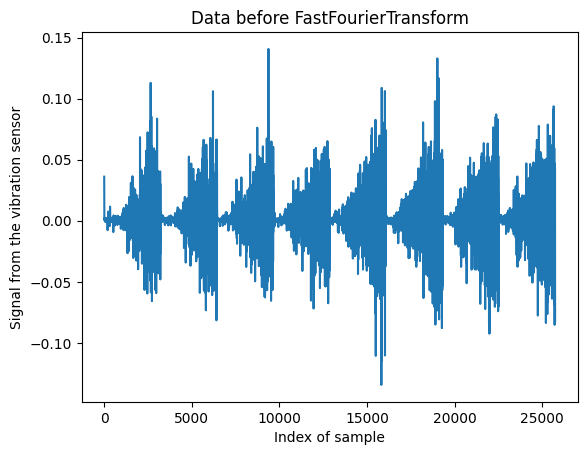

In [ ]:
# input
plt.plot(X[:,:1])
plt.xlabel("Index of sample")
plt.ylabel("Signal from the vibration sensor")
plt.title("Data before FastFourierTransform");

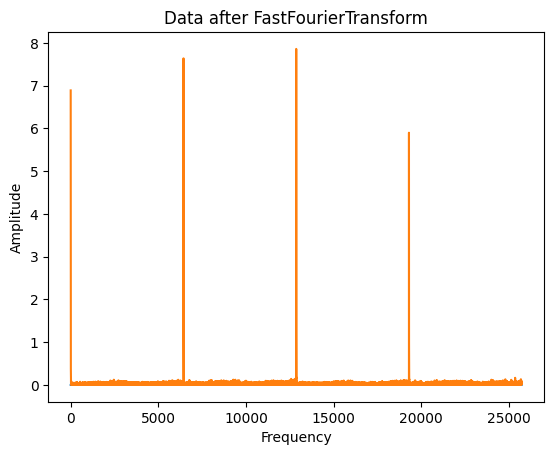

In [ ]:
# check the results
plt.plot(X_fft[:,:2])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Data after FastFourierTransform");

In [ ]:
print(X_train_fft.shape, X_test_fft.shape, X_val_fft.shape)

(23162, 2048) (2574, 2048) (6689, 2048)


In [ ]:
# fit on training only to avoid data leakage
scaler = RobustScaler(quantile_range=(5, 95)).fit(X_train_fft) # it excludes the outliners

X_fft_sc = scaler.transform(X_fft)
X_train_fft_sc = scaler.transform(X_train_fft)
X_test_fft_sc = scaler.transform(X_test_fft)
X_val_fft_sc = scaler.transform(X_val_fft)

In [ ]:
X_val_fft_1 = X_val_fft_sc[:len(y0_val),:]
y_val_1 = y_val[:len(y0_val)]
X_val_fft_2 = X_val_fft_sc[len(y0_val):len(y0_val)+len(y1_val),:]
y_val_2 = y_val[len(y0_val):len(y0_val)+len(y1_val)]
X_val_fft_3 = X_val_fft_sc[len(y0_val)+len(y1_val):len(y0_val)+
                           len(y1_val)+len(y2_val),:]
y_val_3 = y_val[len(y0_val)+len(y1_val):len(y0_val)+len(y1_val)+
                len(y2_val)]
X_val_fft_4 = X_val_fft_sc[len(y0_val)+len(y1_val)+len(y2_val):len(y0_val)+
                           len(y1_val)+len(y2_val)+len(y3_val),:]
y_val_4 = y_val[len(y0_val)+len(y1_val)+len(y2_val):len(y0_val)+len(y1_val)+
                len(y2_val)+len(y3_val)]
#X_val_fft_5 = X_val_fft_sc[len(y0_val)+len(y1_val)+len(y2_val)+len(y3_val):len(y0_val)+
#                           len(y1_val)+len(y2_val)+len(y3_val)+len(y4_val),:]
#y_val_5 = y_val[len(y0_val)+len(y1_val)+len(y2_val)+len(y3_val):len(y0_val)+len(y1_val)+
#                len(y2_val)+len(y3_val)+len(y4_val)]


In [ ]:
model_path = 'drive/MyDrive/fft_models'

In [ ]:
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import BatchNormalization, LeakyReLU, Dense, Dropout
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Flatten,ReLU
from tensorflow.keras. optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2

# added earlyStopCallback to the original model to save training time
# added dropout, because at one run the model didn't generalize well,
# I got much worse results at the evaluation, than with the test set

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 11)

weight_for_0 = len(y)/(2*len([y==0]))
weight_for_1 = len(y)/(2*len([y==1]))
class_weight = {0: weight_for_0, 1 : weight_for_1}

epochs = 20
for i in range(4,5):
    X_input = Input(shape=(X_train_fft.shape[1],), name = "input layer")
    x = X_input
    for j in range(i):
        x = Dense(units = 1024, activation="linear")(x)
        x = LeakyReLU(alpha=0.05)(x)
        x = Dropout(0.2)(x)
    X_output = Dense(units=1, activation="sigmoid")(x)
    model_i = Model(X_input, X_output)

    best_model_file_path = f"{model_path}/fnn_fcn_{i}_layers.h5"
    checkpoint = ModelCheckpoint(best_model_file_path,
                                 monitor="val_loss",
                                 verbose=1,
                                 save_best_only=True,
                                 mode='min')

    model_i.compile(optimizer=Adam(learning_rate = 0.0005),
                   loss= "binary_crossentropy",
                   metrics=["accuracy"]) # ,"Recall", "Precision"

    model_i.fit(X_train_fft_sc,
                y_train,
                epochs = epochs,
                validation_data = (X_test_fft_sc, y_test),
                callbacks=[checkpoint, early_stop],
                class_weight=class_weight)


In [ ]:
from tensorflow.keras.models import load_model

model_loss = []
model_acc = []
model_accs_per_class = []

for i in range(5):
    best_model_filepath = f"{model_path}/fnn_fcn_{i}_layers.h5"
    model_i = load_model(best_model_filepath)
    train_acc_ges = model_i.evaluate(X_train_fft_sc, y_train)
    val_acc_ges = model_i.evaluate(X_val_fft_sc, y_val)

    val_acc_1 = model_i.evaluate(X_val_fft_1, y_val_1)
    val_acc_2 = model_i.evaluate(X_val_fft_2, y_val_2)
    val_acc_3 = model_i.evaluate(X_val_fft_3, y_val_3)
    val_acc_4 = model_i.evaluate(X_val_fft_4, y_val_4)
#    val_acc_5 = model_i.evaluate(X_val_fft_5, y_val_5)

    model_acc.append([train_acc_ges[1], val_acc_ges[1]])
    model_loss.append([train_acc_ges[0], val_acc_ges[0]])
    model_accs_per_class.append([val_acc_1, val_acc_2, val_acc_3, val_acc_4])#, val_acc_5])


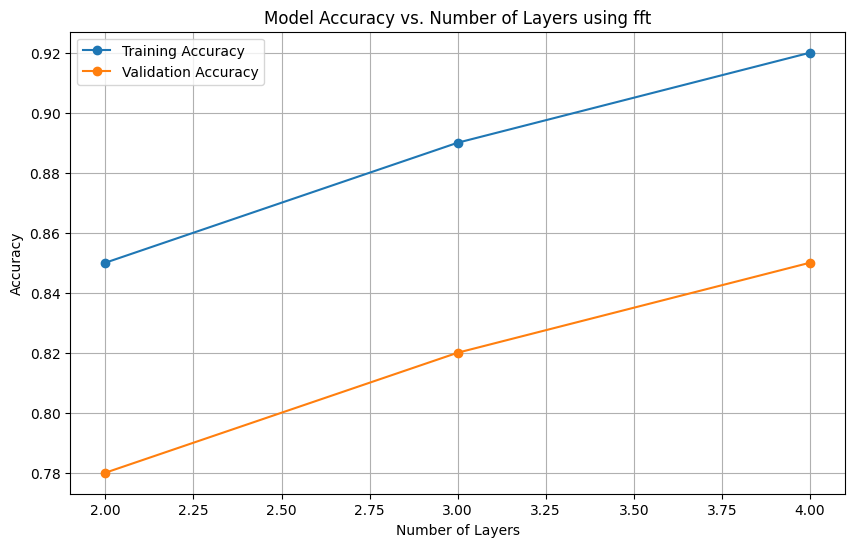

In [ ]:
import matplotlib.pyplot as plt

accuracy_train = [0.85, 0.89, 0.92]
accuracy_val = [0.78, 0.82, 0.85]

# Define the number of layers for the x-axis
num_layers = [2, 3, 4]  # Replace with the actual number of layers used in your code

# Plotting the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(num_layers, accuracy_train, marker='o', label='Training Accuracy')
plt.plot(num_layers, accuracy_val, marker='o', label='Validation Accuracy')

plt.title('Model Accuracy vs. Number of Layers using fft')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Why did the FFT work so well? Domain knowledge summary** ⭐
If you think about it...
The reading of the vibration sensors is something like that:

With the rotating shaft balanced the centrifugal forces cancel out each other.
If there is unbalance, thus it creates centrifugal force.

✈`Fc = m * range * angular velocity(squared) `

The unbalancing weight rotates with the shaft, so in 2D,
the vibration sensor pick up the 1D projection (like shadow of the clock-hand)
of that, so the equation changes to:

▶`Fsensor = Fc * sin(alpha)` #if the sensor is in vertical position, `cos(alpha)` if it is horizontal

where alpha is the 'position' of the shaft

If you apply Fourier transformation of Fsensor, as I mentioned before
you get back amplitude, what is the centrifugal force in this case.

It also implies the frequency, in this case angular speed. (as ang speed = 2* pi* freq)

Deeplearning models are quite bad with trigonometry, like sin, cos waves and squares. In this case the four fully connected (Dense) layer manages to figure it out quite accurately.

At least this is my theory, If I'm wrong I'm happy to fix the notes here.

# Just Some Definitions to stay clear minded

**Class Weight:**

---
Definition: In the context of machine learning, class weights are used to give different importance to different classes in the training dataset. It is particularly useful when dealing with imbalanced datasets, where some classes have significantly fewer samples than others.
Explanation: By assigning higher weights to underrepresented classes, the model pays more attention to those classes during training, which can help improve the model's performance on minority classes.

**Dense Layer:**

---



Definition: A dense layer, also known as a fully connected layer, is a type of neural network layer where each neuron or node in the layer is connected to every neuron in the previous layer.
Explanation: Dense layers are commonly used in neural networks for learning complex patterns and relationships in data. The term "dense" refers to the dense connectivity between neurons in consecutive layers.

**Linear Activation**:

---



Definition: Linear activation, or identity activation, is an activation function that computes a linear weighted sum of its input.
Explanation: In the context of a neural network, a linear activation function does not introduce non-linearity to the model. It is mainly used in the output layer when the network is performing a regression task, where the goal is to predict a continuous value.

**Leaky ReLU Activation Function:**

---


Definition: Leaky Rectified Linear Unit (Leaky ReLU) is an activation function that allows a small, non-zero gradient when the input is negative.
Explanation: Unlike the traditional ReLU activation function, which turns all negative values to zero, Leaky ReLU allows a small negative slope for negative inputs. This small slope helps prevent the "dying ReLU" problem, where neurons can become inactive during training.

**Dropout for Regularization:**

---


Definition: Dropout is a regularization technique where randomly selected neurons are ignored or "dropped out" during training.
Explanation: During each training iteration, a random subset of neurons is set to zero, preventing the network from relying too much on specific neurons. This helps prevent overfitting and encourages the model to learn more robust features.

**Sigmoid Activation Function:**

---


Definition: The sigmoid activation function squashes its input values to the range (0, 1), making it suitable for binary classification problems.
Explanation: In the output layer of a neural network for binary classification, the sigmoid activation function is commonly used. It transforms the network's raw output into a probability score between 0 and 1, indicating the likelihood of belonging to a particular class.

**Adam Optimizer:**

---


Definition: Adam (short for Adaptive Moment Estimation) is an optimization algorithm used to update the weights of a neural network during training.
Explanation: Adam combines ideas from both momentum and RMSprop to adaptively adjust learning rates for each parameter. It is widely used in training deep neural networks and often performs well across different types of datasets
.

**Binary Classification:**

---



Definition: Binary classification is a type of machine learning task where the goal is to categorize input data into one of two possible classes or categories.
Explanation: In the context of neural networks, the output layer typically consists of one neuron with a sigmoid activation function, representing the probability of belonging to one of the two classes. The model predicts class 1 if the output probability is above a certain threshold (e.g., 0.5) and class 0 otherwise. Examples of binary classification tasks include spam detection (spam or not spam) or medical diagnosis (healthy or diseased).